In [1]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

plt.style.use("ggplot")

In [2]:
df_canada = pd.read_excel(
    "data/Canada.xlsx", sheet_name="Canada by Citizenship",
    skiprows=range(20), skipfooter=2
)
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_canada = df_canada.drop(columns=["Type", "Coverage", "AREA", "REG", "DEV"])
df_canada = df_canada.rename(columns={
    "OdName": "country",
    "AreaName": "continent",
    "RegName": "region"
})
df_canada["total"] = df_canada.sum(axis=1)
df_canada = df_canada.set_index("country")
df_canada.index.name = None
df_canada.head()

,continent,region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [5]:
with open("data/alice_novel.txt", "r") as f:
    alice_novel = f.read()

In [6]:
print(STOPWORDS)

{'are', "wasn't", 'over', 'own', 'does', 'out', 'any', 'same', 'just', "shouldn't", "how's", "you'd", "who's", 'otherwise', 'this', "he's", 'itself', 'them', 'very', 'above', 'but', 'who', "let's", 'would', 'theirs', "they've", "won't", 'else', 'our', "doesn't", "couldn't", 'under', 'do', 'too', 'most', 'where', 'and', 'because', 'at', 'all', 'should', 'there', 'no', 'of', 'has', 'after', 'both', "he'll", 'off', 'in', 'these', 'ought', "you've", 'some', 'or', 'those', "you'll", 'before', "hadn't", 'into', 'than', 'nor', 'therefore', 'shall', "she'll", 'against', 'also', 'if', 'me', "don't", "they'll", 'few', 'about', "she's", "you're", 'an', 'what', "haven't", "there's", 'once', "why's", 'herself', "we're", 'such', 'each', 'was', 'as', "he'd", 'how', 'ever', "that's", "weren't", 'could', 'having', 'why', 'www', "i'd", 'did', 'a', 'your', 'during', 'with', 'were', "i've", 'ourselves', 'by', 'here', "didn't", "we'd", "we've", 'yours', 'they', 'she', "she'd", 'we', 'to', 'himself', 'my', 

In [7]:
alice_wc = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=STOPWORDS
)
alice_wc.generate(alice_novel)

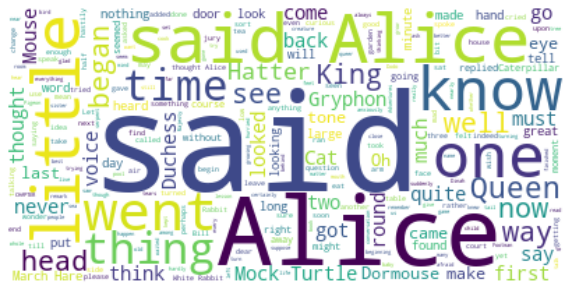

In [8]:
plt.figure(figsize=(10, 6))
plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

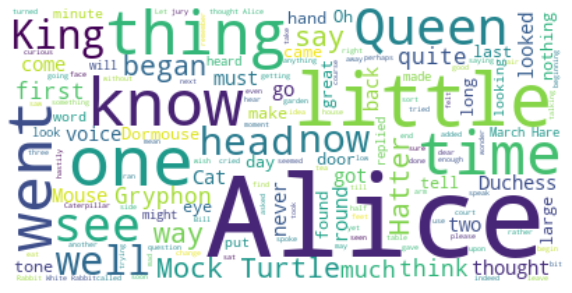

In [9]:
STOPWORDS.add("said")

alice_wc.generate(alice_novel)

plt.figure(figsize=(10, 6))
plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
alice_img = Image.open("data/alice_mask.png")

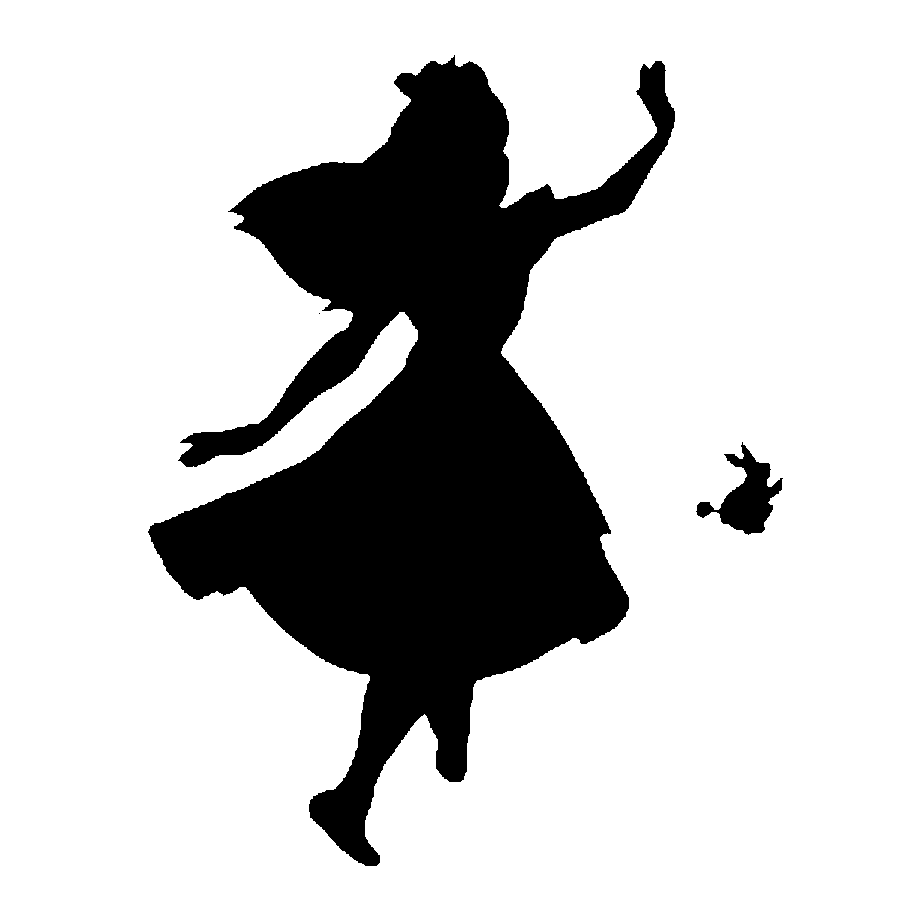

In [11]:
alice_img

In [12]:
alice_mask = np.array(alice_img)

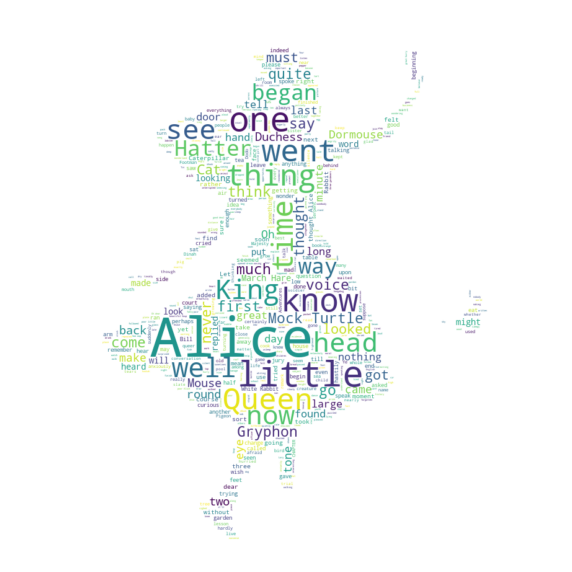

In [13]:
alice_wc = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=STOPWORDS,
    mask=alice_mask
)
alice_wc.generate(alice_novel)

plt.figure(figsize=(10, 14))
plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
df_canada.loc["China", "total"] / float(df_canada.total.sum())

0.10297179674131668

In [15]:
max_words = 1000
word_string = ""

for country in df_canada.index.tolist():
    if len(country.split(" ")) == 1:
        num_repeat = int(
            df_canada.loc[country, "total"] / float(df_canada.total.sum()) * max_words
        )
        word_string = word_string + ((country + " ")*num_repeat)

print(word_string)

Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Albania Albania Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Argentina Argentina Argentina Australia Australia Australia Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Barbados Belarus Belgium Brazil Brazil Brazil Brazil Bulgaria Bulgaria Bulgaria Burundi Cambodia Cameroon Cameroon Chile Chile Chile China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China C

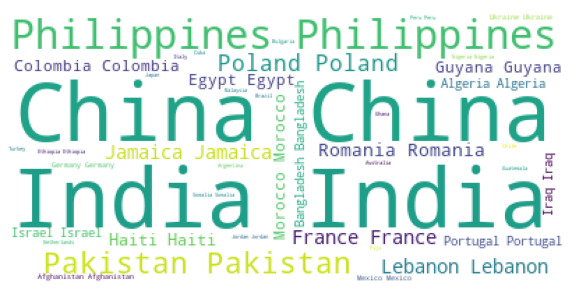

In [16]:
canada_wc = WordCloud(background_color="white")
canada_wc.generate(word_string)

plt.figure(figsize=(10, 14))
plt.imshow(canada_wc)
plt.axis("off")
plt.show()

In [17]:
world_map = folium.Map()
world_map

In [18]:
semarang_map = folium.Map(location=(-6.9932, 110.4203), zoom_start=11.5)
semarang_map

In [19]:
hacktiv8_map = folium.Map(location=(-6.2607187, 106.7816162), zoom_start=15)
hacktiv8_map

In [20]:
bandung_map = folium.Map(location=(-6.903429, 107.5030708), zoom_start=11)
bandung_map